In [11]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join, isdir
from typing import Dict, Tuple, Sequence

In [16]:
def fetch_directories(path: str) -> [str]:    
    directories = []
    try:
        directories = [join(path, f) for f in listdir(path) if isdir(join(path, f))] 
    except:
        print("Trouble opening a directory")
        return directories
    return directories

def fetch_files(path: str) -> [str]:    
    files = []
    try:
        files = [f for f in listdir(path) if isfile(join(path, f))] 
    except:
        print("Trouble opening a directory")
        return files
    return files

In [36]:
class FileHandler:
    def __init__(self, file: str, path: str):
        self.filename = file
        self.total_gain = 2
        with open(join(path, file)) as f:
            self.content = json.loads(f.read())
        self.scores = [x["score"] for x in self.content]

        
    @property
    def filename(self) -> str:
        return self.__filename
    
    @filename.setter
    def filename(self, filename: str):
        self.__filename = filename
        
    @property
    def content(self) -> str:
        return self.__content
    
    @content.setter
    def content(self, content: str):
        self.__content = content
        
    @property
    def total_gain(self) -> float:
        return self.__total_gain
    
    @total_gain.setter
    def total_gain(self, total_gain: float):
        self.__total_gain = total_gain
        
    @property
    def scores(self) -> str:
        return self.__scores
    
    @scores.setter
    def scores(self, scores: [float]):
        self.__scores = scores
        
    def get_best_indexes_count(self) -> Dict[int, int]:
        indexes = np.array([x['supply_gain'] for x in self.content]).ravel()
        tmp = np.array([x['demand_gain'] for x in self.content]).ravel()
        indexes = np.array((indexes, tmp)).ravel()
        unique, counts = np.unique(indexes, return_counts = True)
        return dict(zip(unique, counts))
    
    def get_number_of_arbitrages(self) -> int:
        return len(self.scores)
    
    def get_average_score(self) -> float:
        if len(self.scores):
            return sum(self.scores)/len(self.scores)
        return 1
    
    def get_best_score(self) -> float:
        if len(self.scores):
            return max(self.scores)
        return 1
    

Average daily arbitrages: 284.14285714285717
Average score overall: 1.000272278101059
The best overall score: 1.00307


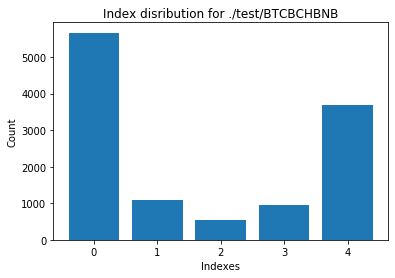

Average daily arbitrages: 254.5
Average score overall: 1.0004839785890096
The best overall score: 1.0027


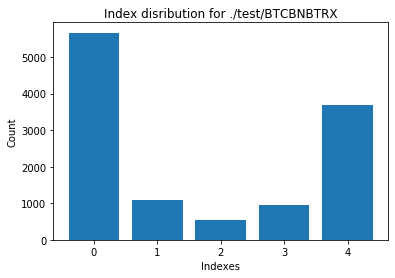

Average daily arbitrages: 1153.3333333333333
Average score overall: 1.000525942657009
The best overall score: 1.00484


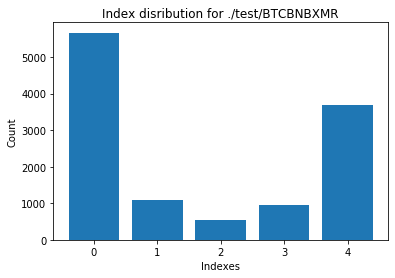

Average daily arbitrages: 531.6666666666666
Average score overall: 1.000357971547634
The best overall score: 1.00259


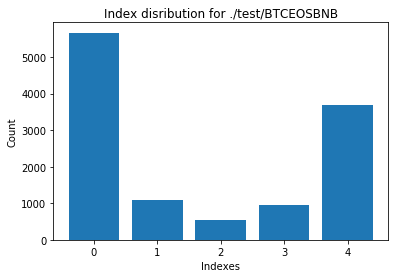

Average daily arbitrages: 4849.333333333333
Average score overall: 1.0003356824930365
The best overall score: 1.00361


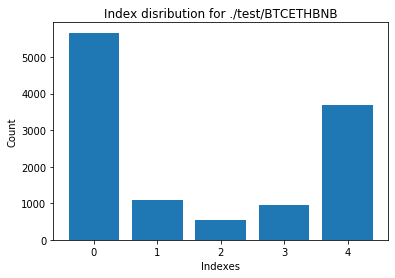

In [39]:
class Triangle:
    def __init__(self, files: [str], path: str):
        self.__files = []
        self.__index_counts = None
        self.__path = path
        for f in files:
            self.__files.append(FileHandler(f, path))
            

    @property
    def path(self) -> str:
        return self.__path
            
    def get_best_indexes_count(self) -> Dict[int, int]:
        if self.__index_counts is None:
            index_counts = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
            for d in np.array([x.get_best_indexes_count() for x in self.__files]):
                for k in d.keys():
                    index_counts[k] += d[k]
            self.__index_counts = index_counts
        return self.__index_counts
    
    def get_daily_number_average_of_arbitrages(self) -> int:
        return sum([x.get_number_of_arbitrages() for x in self.__files])/len(self.__files)
    
    def get_average_score(self) -> float:
        return sum([x.get_average_score() for x in self.__files])/len(self.__files)
    
    def get_best_score(self) -> float:
        return max([x.get_best_score() for x in self.__files])

path = "./test/"    

triangles = []
count = 0
for directory in fetch_directories(path):
    triangles.append(Triangle(fetch_files(directory), directory))
    count += 1
    if count == 5:
        break

for t in triangles: 
    a = triangles[0].get_best_indexes_count()
    print("Average daily arbitrages:", t.get_daily_number_average_of_arbitrages())
    print("Average score overall:", t.get_average_score())
    print("The best overall score:", t.get_best_score())
    index_distribution = plt.bar(a.keys(), a.values())
    plt.xlabel("Indexes")
    plt.ylabel("Count")
    plt.title("Index disribution for " + t.path)
    plt.show()

In [ ]:
df = {}
with open("./test/BTCBCHBNB/BTCBCHBNB-2020-02-26.json") as f:
    df = json.loads(f.read())
df

In [3]:
scores = [x["score"] for x in df]
print("Number of arbitrages:", len(scores))
print("Average score:", sum(scores)/len(scores))
print("Maximum score:", max(scores))
print("Minimum score:", min(scores))

Number of arbitrages: 1316
Average score: 1.00043710486322
Maximum score: 1.00307
Minimum score: 1


In [7]:
def get_narrowest(p1: [float], p2: [float], p3: [float]) -> float:
    a = []
    a.append(min(np.prod(p2), p1[1]))
    a.append(min(np.prod(p3), p2[1]))
    a.append(min(np.prod(p1), p3[1]))
    a[1] = a[1] * p1[0]
    a[2] = a[2] * p2[0] * p1[0]
    return min(a)


# def get_max_gain(df):
#     pairs = df['pairs']
#     max_gain = 0
#     for p1 in pairs[0]['supply']:
#         for p2 in pairs[1]['demand']:
#             for p3 in pairs[2]['demand']:
#                 score = p1[0]/p2[0]/p3[0]
#                 if score > 1:
#                     gain = get_narrowest(p1, p2, p3) * (score-1)
#                     if max_gain < gain:
#                         max_gain = gain
#     return max_gain

# gains = []
# for d in df:
#     gains.append(get_max_gain(d))

# currency = df[0]['pairs'][0]['currency'][0:3]
# print("Total daily market inefficiency:", sum(gains), currency)
# print("Max theoretical daily gain:", max(gains), currency)

Total daily market inefficiency: 0.04784531213980099 BCH
Max theoretical daily gain: 0.00048003769667434744 BCH
